In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [43]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pratik2901/multiclass-weather-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Oa\.cache\kagglehub\datasets\pratik2901\multiclass-weather-dataset\versions\3


In [44]:
#download the weather images and put them in a directory
path = r'D:\WORK\Bootcamp\Machine Learning\Achievement 1\Project\Data\Original\Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [45]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [46]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [47]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 20, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

c:\Users\Oa\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 159s 5s/step - accuracy: 0.4463 - loss: 0.1585 - val_accuracy: 0.7812 - val_loss: 0.0927
Epoch 2/20
 1/28 ━━━━━━━━━━━━━━━━━━━━ 2:15 5s/step - accuracy: 0.7500 - loss: 0.1082

c:\Users\Oa\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 386ms/step - accuracy: 0.7500 - loss: 0.1082 - val_accuracy: 0.7545 - val_loss: 0.0902
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 152s 5s/step - accuracy: 0.7404 - loss: 0.0860 - val_accuracy: 0.7366 - val_loss: 0.1005
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 371ms/step - accuracy: 0.8125 - loss: 0.0968 - val_accuracy: 0.7098 - val_loss: 0.1085
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 153s 5s/step - accuracy: 0.8349 - loss: 0.0636 - val_accuracy: 0.7902 - val_loss: 0.0806
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 402ms/step - accuracy: 0.8125 - loss: 0.0613 - val_accuracy: 0.7679 - val_loss: 0.0808
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 159s 6s/step - accuracy: 0.8358 - loss: 0.0597 - val_accuracy: 0.8080 - val_loss: 0.0766
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 451ms/step - accuracy: 0.8438 - loss: 0.0544 - val_accuracy: 0.7679 - val_loss: 0.0843
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 153s 5s/step - accuracy: 0.8555 - loss: 0.0557 - val_accuracy: 0.7902 - val_

In [48]:
results = pd.DataFrame(model.history.history)

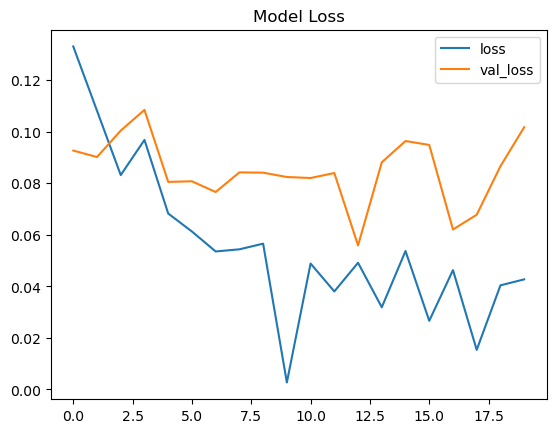

In [49]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

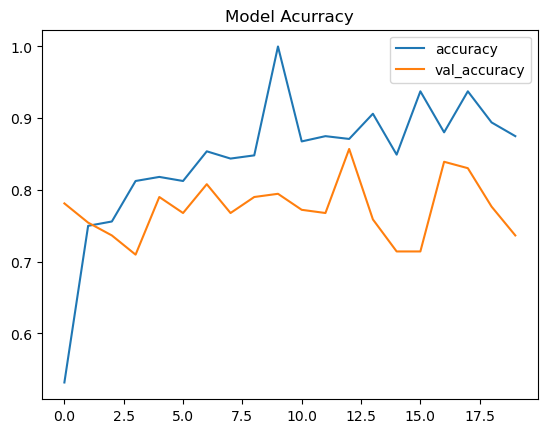

In [50]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [51]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.875, Val_Accuracy: 0.7366071343421936
Loss: 0.042734064161777496, Val_Loss: 0.10177036374807358


11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step


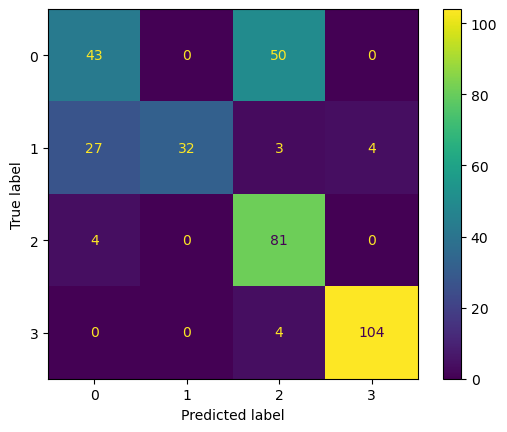

In [52]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [53]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


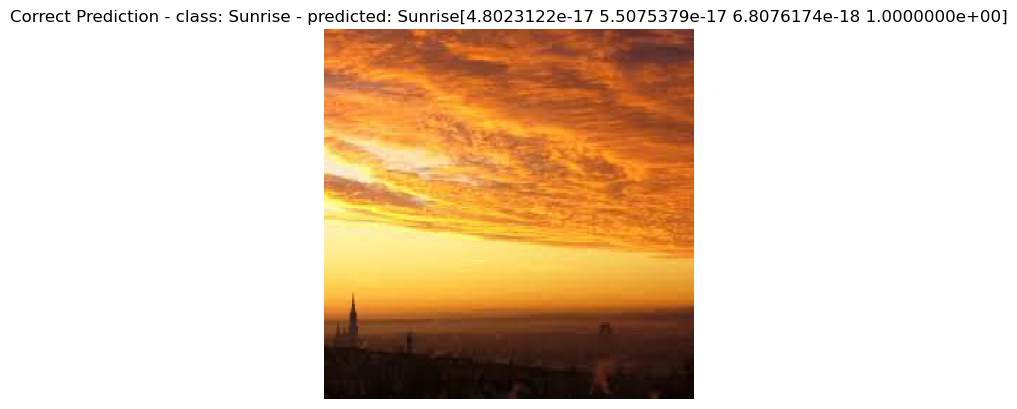

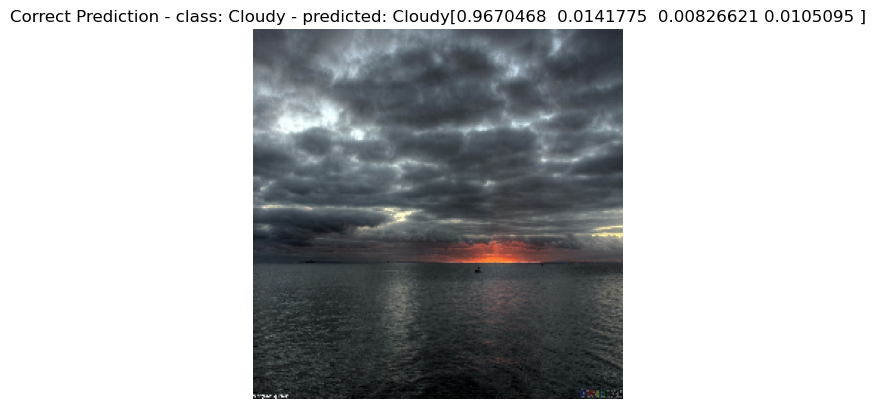

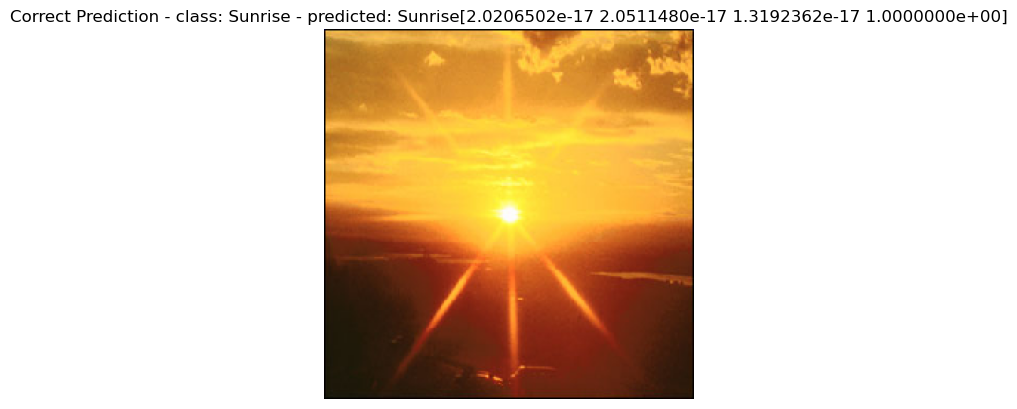

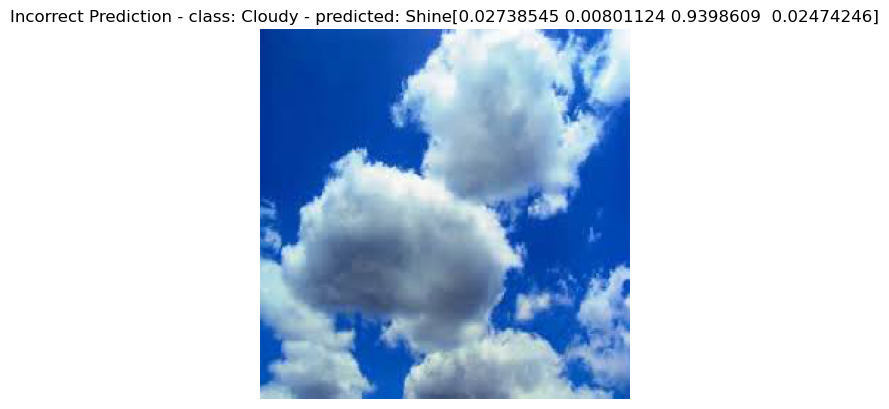

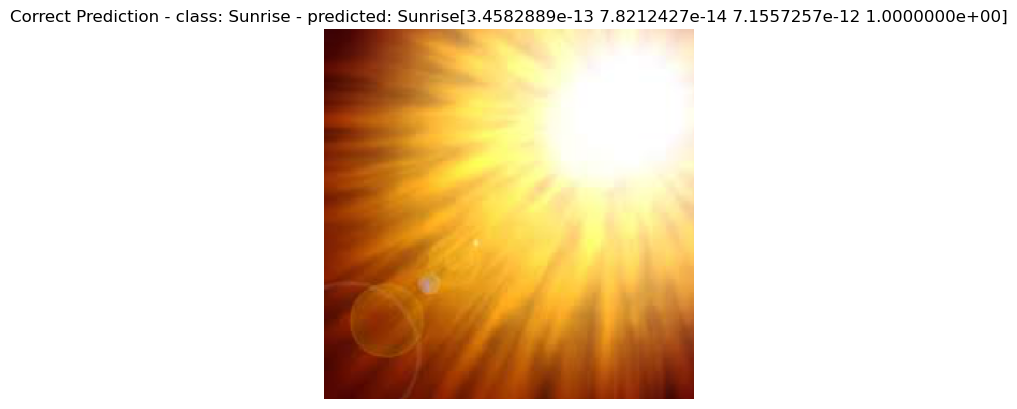

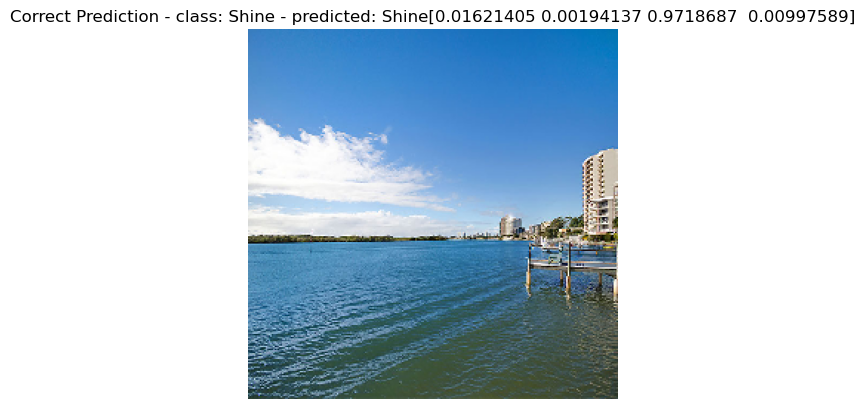

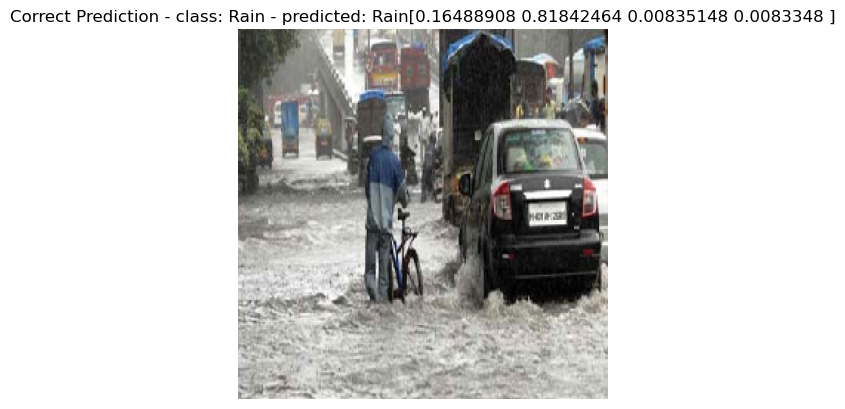

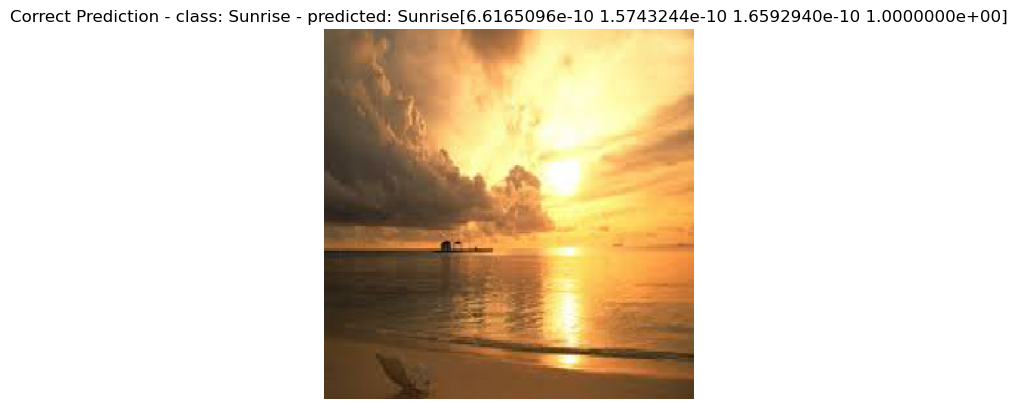

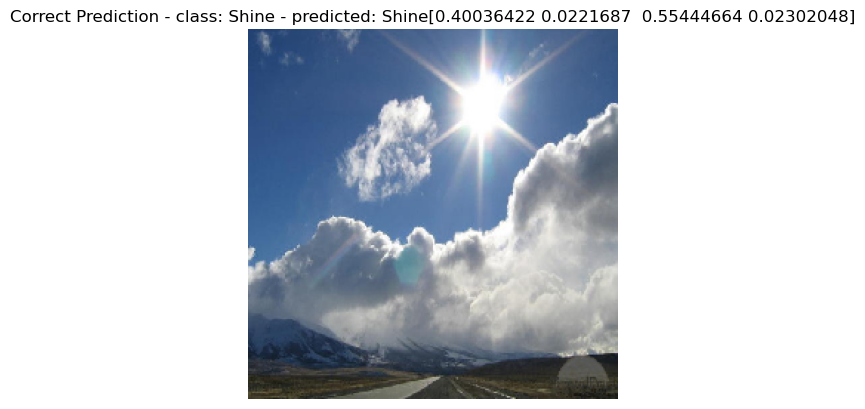

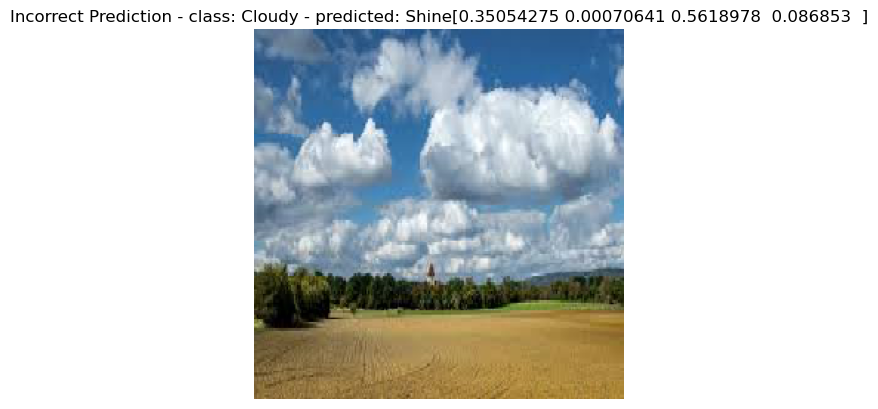

In [55]:
predict_one(model, 10) #<--you can show multiple pictures with this command. Just fill in the number you want to see.